##  3 silver bullets of word embeddings in NLP

The "three silver bullets" of word embeddings in NLP are:

1. **Semantic Representation**: Word embeddings capture the semantic meaning of words by mapping them to vectors in a continuous space. Words with similar meanings are located close to each other in this space, making it easier for models to understand and process linguistic information.

2. **Dimensionality Reduction**: Embeddings reduce the dimensionality of sparse, high-dimensional word representations (like one-hot encoding). This compact representation allows models to process data more efficiently, improving computational performance and reducing memory requirements.

3. **Transfer Learning**: Pre-trained word embeddings (like Word2Vec, GloVe, or FastText) can be fine-tuned on specific tasks, transferring knowledge from large corpora to domain-specific applications. This improves model performance with less data and less training time.

## bag-of-word (BoW)

xem thêm : https://readmedium.com/3-basic-approaches-in-bag-of-words-which-are-better-than-word-embeddings-c2cbc7398016

Sơ lược về bag of word :

Khi nào nên sử dụng BoW

Bạn đang xây dựng một mô hình cơ bản. Bằng cách sử dụng scikit-learn, chỉ cần vài dòng mã là có thể xây dựng mô hình. Sau đó, có thể sử dụng Deep Learning để vượt qua hiệu suất của mô hình này.

Nếu tập dữ liệu của bạn nhỏ và **ngữ cảnh mang tính chuyên biệt theo lĩnh vực**, BoW (Bag of Words) có thể hoạt động tốt hơn so với Word Embedding. Ngữ cảnh rất chuyên biệt **theo lĩnh vực** có nghĩa là bạn không thể tìm thấy vector tương ứng từ các mô hình Word Embedding đã được huấn luyện sẵn (như GloVe, fastText, v.v.).

Có 3 cách xây dựng BoW cơ bản:



### Count Occurrence



Counting word occurrence. The reason behind of using this approach is that keyword or important signal will occur again and again. So if the number of occurrence represent the importance of word. More frequency means more importance

In [ ]:
import numpy as np

In [ ]:
doc = "tam oc cho tam, ngu nhu cho, tam yeu tinh va hang, tam thich suc cat"

doc = doc.lower().replace(',','').split(" ")
len(doc)

16

In [ ]:
def count_occurrence(doc):
    word_count = {}
    for word in doc:
        if word not in word_count:
            word_count[word] = 1
        else:
            word_count[word] += 1
    return word_count
d  = count_occurrence(doc)

In [ ]:
def normal_dist(x, mean = 0, sd=1):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density


In [ ]:
result = normal_dist(4, 0, 1)
result

0.0010538869273724577

In [ ]:
import statistics

keys = list(d.keys())
values = list(d.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

print(sorted_dict)

{'oc': 1, 'ngu': 1, 'nhu': 1, 'yeu': 1, 'tinh': 1, 'va': 1, 'hang': 1, 'thich': 1, 'suc': 1, 'cat': 1, 'cho': 2, 'tam': 4}


### Normalized Count Occurrence



In [ ]:
len(doc)

65

In [ ]:
sorted_dict = {keys[i]: normal_dist(values[i],statistics.mean(values),statistics.variance(values)) for i in sorted_value_index}
sorted_dict

{'oc': 2.263295237412396,
 'ngu': 2.263295237412396,
 'nhu': 2.263295237412396,
 'yeu': 2.263295237412396,
 'tinh': 2.263295237412396,
 'va': 2.263295237412396,
 'hang': 2.263295237412396,
 'thich': 2.263295237412396,
 'suc': 2.263295237412396,
 'cat': 2.263295237412396,
 'cho': 1.7303621065016264,
 'tam': 0.008054762170534165}

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer # import the  TfidfVectorizer

# Assuming 'doc' is a list of words, join them into a string
doc = ' '.join(doc)

norm_count_vec = TfidfVectorizer(use_idf=False, norm='l2')
norm_count_occurs = norm_count_vec.fit_transform([doc]) # Pass the string to fit_transform
norm_count_occur_df = pd.DataFrame(
    (count, word) for word, count in zip(
    norm_count_occurs.toarray().tolist()[0],
    norm_count_vec.get_feature_names_out()))
norm_count_occur_df.columns = ['Word', 'Count']
norm_count_occur_df.sort_values(
    'Count', ascending=False, inplace=True)
norm_count_occur_df.head()

,Word,Count
7,tam,0.730297
1,cho,0.365148
0,cat,0.182574
2,hang,0.182574
3,ngu,0.182574


### TF-IDF

What ?

Term Frequency — Inverse Document Frequency (TF-IDF) is a widely used statistical method in natural language processing and information retrieval. **It measures how important a term is within a document relative to a collection of documents.** (Aim)

Why ?

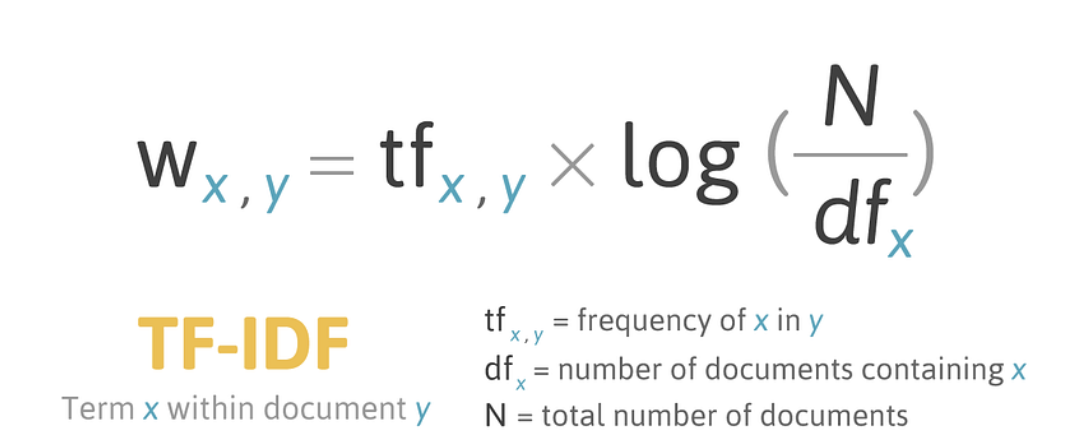

y = document  (một tài liệu cụ thể)

documents = corpus (kho văn bản)

TF-IDF take another approach which is believe that high frequency may not able to provide much information gain. In another word, rare words contribute more weights to the model.

Word importance will be increased if the number of occurrence within same document (i.e. training record). On the other hand, it will be decreased if it occurs in corpus (i.e. other training records).

TF-IDF (Term Frequency-Inverse Document Frequency) **sử dụng một cách tiếp cận khác, cho rằng tần suất xuất hiện cao có thể không cung cấp nhiều thông tin hữu ích. Nói cách khác, các từ hiếm sẽ đóng góp nhiều trọng số hơn cho mô hình.**

**Tầm quan trọng của một từ sẽ tăng lên nếu số lần xuất hiện trong cùng một tài liệu (tức là bản ghi huấn luyện) nhiều. Ngược lại, nó sẽ giảm nếu từ đó xuất hiện trong tập hợp các tài liệu khác (tức là các bản ghi huấn luyện khác).**

Xem thêm : https://github.com/makcedward/nlp/blob/master/sample/nlp-bag_of_words.ipynb

How TF-IDF Words?

**Term Frequency (TF):**

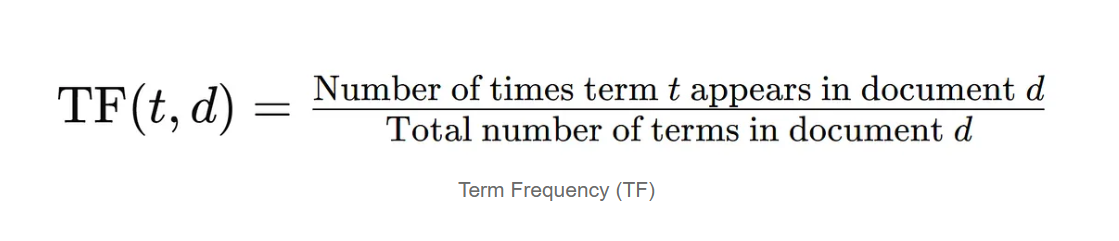

Số lần term t xuất hiện trong d / len(d) : tức là tần số t xuất hiện


**Inverse Document Frequency (IDF):**

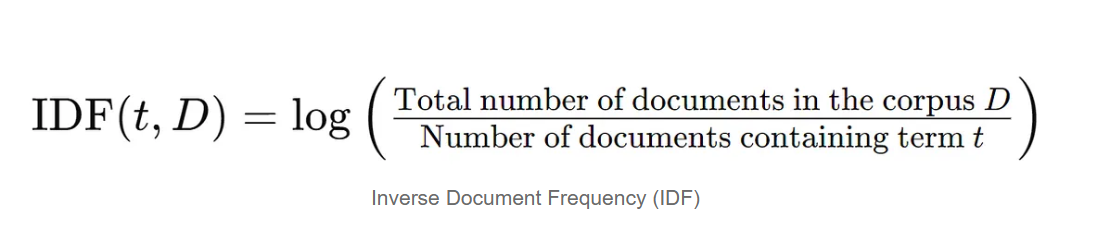

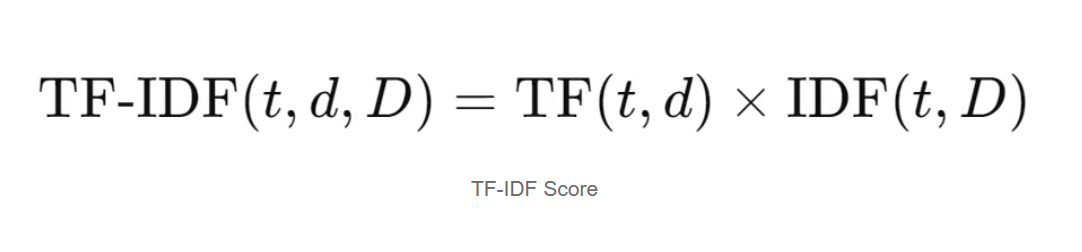

Nó mang lại trọng số cao hơn cho các thuật ngữ thường xuyên xuất hiện trong một tài liệu nhưng hiếm gặp trong toàn bộ kho văn bản.

D is corpus kho văn bản .

d document cụ thể

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

documents = [
    "The cat sat on the mat.",
    "The dog played in the yard.",
    "The cat and the dog are friends."
]

words_set = set()

# Create a set of unique words in the corpus
for doc in documents:
    words = doc.lower().replace('.','').split(" ")
    words_set = words_set.union(set(words))

# Convert the set of words into a list
words_list = list(words_set)

print('Number of words in the corpus:', len(words_set))
print('The words in the corpus: \n', words_set)

# Number of documents in the corpus
n_docs = len(documents)

# Number of unique words in the corpus
n_words_set = len(words_set)

# Initialize DataFrame to store Term Frequency (TF) values
df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=words_list)

# Compute Term Frequency (TF)
for i in range(n_docs):
    words = documents[i].lower().replace('.','').split(" ")  # Words in the document
    for w in words:
        df_tf.at[i, w] += 1 / len(words)

print("\nTerm Frequency (TF) DataFrame:")
print(df_tf)

print("\nIDF(Inverse Document Frequency) :")
idf = {}

# Compute Inverse Document Frequency (IDF)
k1 = []
for w in words_list:
    k = sum([1 for doc in documents if w in doc.replace('.','').split(" ")])
    k1.append(k)
    idf[w] = np.log10(n_docs / (k))
    print(f'{w:>15}: {idf[w]:>10}')

# Initialize a TF-IDF DataFrame
tf_idf = df_tf.copy()
for word in idf:
    tf_idf[word] = df_tf[word] * idf[word]
print("\nTerm Frequency (TF-idf) DataFrame:")
print(df_tf)


# Use TfidfVectorizer to compute TF-IDF scores
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_array = tfidf_matrix.toarray()

words_set_sklearn = tfidf_vectorizer.get_feature_names_out()

df_tf_idf_sklearn = pd.DataFrame(tfidf_array, columns=words_set_sklearn)

print("\nTF-IDF DataFrame (Computed using TfidfVectorizer):")
print(df_tf_idf_sklearn)

Number of words in the corpus: 12
The words in the corpus: 
 {'and', 'dog', 'played', 'mat', 'yard', 'sat', 'cat', 'in', 'are', 'on', 'the', 'friends'}

Term Frequency (TF) DataFrame:
        and       dog    played       mat      yard       sat       cat  \
0  0.000000  0.000000  0.000000  0.166667  0.000000  0.166667  0.166667   
1  0.000000  0.166667  0.166667  0.000000  0.166667  0.000000  0.000000   
2  0.142857  0.142857  0.000000  0.000000  0.000000  0.000000  0.142857   

         in       are        on       the   friends  
0  0.000000  0.000000  0.166667  0.333333  0.000000  
1  0.166667  0.000000  0.000000  0.333333  0.000000  
2  0.000000  0.142857  0.000000  0.285714  0.142857  

IDF(Inverse Document Frequency) :
            and: 0.47712125471966244
            dog: 0.17609125905568124
         played: 0.47712125471966244
            mat: 0.47712125471966244
           yard: 0.47712125471966244
            sat: 0.47712125471966244
            cat: 0.17609125905568124
     

**Ứng dụng của TF-IDF:**
1. **Truy xuất thông tin:** TF-IDF được sử dụng rộng rãi trong các công cụ tìm kiếm để trả về tài liệu liên quan dựa trên truy vấn của người dùng. Tài liệu có điểm TF-IDF cao hơn cho các từ truy vấn được coi là liên quan hơn.
2. **Phân loại tài liệu:** TF-IDF hỗ trợ xác định chủ đề hoặc danh mục của tài liệu bằng cách tìm ra các từ đặc trưng của từng lớp tài liệu.
3. **Trích xuất từ khóa:** TF-IDF giúp trích xuất từ khóa quan trọng từ tài liệu để lập chỉ mục, tóm tắt hoặc phân tích nội dung.
4. **Tóm tắt văn bản:** TF-IDF hỗ trợ tóm tắt bằng cách ưu tiên các từ hoặc câu quan trọng trong tài liệu.
5. **Trích xuất thông tin:** TF-IDF giúp xác định và gán trọng số cho các thuật ngữ hoặc thực thể liên quan trong văn bản.

**Ưu điểm của TF-IDF:**
1. **Nhấn mạnh các thuật ngữ quan trọng:** TF-IDF tập trung vào các thuật ngữ có tần suất cao trong tài liệu nhưng hiếm trong tập dữ liệu.
2. **Xử lý từ dừng (stopwords):** Tự động giảm trọng số các từ phổ biến nhưng không mang nhiều ý nghĩa.
3. **Đơn giản và hiệu quả:** Dễ thực hiện và tính toán, thích hợp cho việc xử lý dữ liệu văn bản lớn.
4. **Độc lập ngôn ngữ:** Áp dụng được cho nhiều ngôn ngữ mà không cần điều chỉnh.
5. **Dễ hiểu:** Điểm số TF-IDF cung cấp thước đo rõ ràng về mức độ liên quan của các thuật ngữ trong tài liệu.

**Nhược điểm của TF-IDF:**
1. **Không xét đến sự tương đồng ngữ nghĩa:** Không nắm bắt được mối quan hệ ngữ nghĩa giữa các từ.
2. **Nhạy cảm với độ dài tài liệu:** Tài liệu dài hơn có thể có TF cao hơn cho một số từ do chứa nhiều từ hơn.
3. **Thông tin ngữ cảnh hạn chế:** Không xem xét thứ tự từ hoặc ngữ cảnh trong tài liệu.

xem thêm : https://readmedium.com/3-basic-approaches-in-bag-of-words-which-are-better-than-word-embeddings-c2cbc7398016

## 2 latent methods for dimension reduction and topic modeling

https://readmedium.com/2-latent-methods-for-dimension-reduction-and-topic-modeling-20ff6d7d547

### Latent Semantic Analysis (LSA)

Why ?   LSA is reducing dimension for classification. The idea is that words will occurs in similar pieces of text if they have similar meaning. We usually use Latent Semantic Indexing (LSI) as an alternative name in NLP field.

WHAT ? The challenge is that the matrix is very sparse (or high dimension) and noisy (or include lots of low frequency word). So truncated SVD is adopted to reduce dimension.

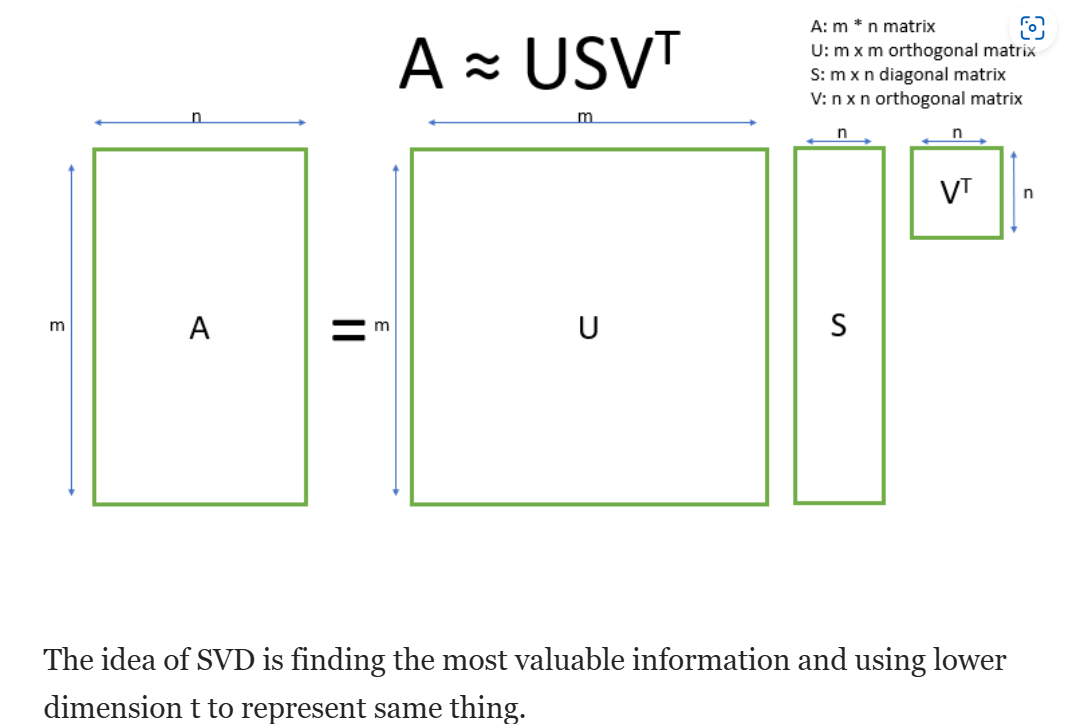

In [ ]:
from sklearn.datasets import fetch_20newsgroups
train_raw = fetch_20newsgroups(subset='train')
test_raw = fetch_20newsgroups(subset='test')

x_train = train_raw.data
y_train = train_raw.target
x_test = test_raw.data
y_test = test_raw.target

print(len(x_train))
print(len(x_test))

11314
7532


In [ ]:
import pandas as pd

df = pd.DataFrame(x_train, columns=['text'])
df['target'] = y_train


In [ ]:
df.head()

,text,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

class LSA:
  def __init__(self, num_dim):
    self.num_dim = num_dim
    self.vectorizer = TfidfVectorizer(stop_words='english')
    self.svd = TruncatedSVD(n_components=self.num_dim)
    self.pipeline = make_pipeline(self.vectorizer, self.svd)

  def forward(self, x_train, x_test):
    return self.pipeline.fit_transform(x_train), self.pipeline.transform(x_test)


num_dim = 50
build_LSA = LSA(num_dim)
x_train_lsa, x_test_lsa = build_LSA.forward(x_train, x_test)

LogR have LSA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

lr_model = LogisticRegression(solver='newton-cg',n_jobs=-1)
lr_model.fit(x_train_lsa, y_train)

cv = KFold(n_splits=5, shuffle=True)

scores = cross_val_score(lr_model, x_test_lsa, y_test, cv=cv, scoring='accuracy')
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.6942 (+/- 0.0076)


LogR haven't LSA

In [ ]:
# Assuming x_train contains raw text data
vectorizer = TfidfVectorizer(stop_words='english')  # Initialize a TfidfVectorizer
x_train_vec = vectorizer.fit_transform(x_train)  # Transform x_train into numerical features
x_test_vec = vectorizer.transform(x_test)    # Transform x_test using the same vectorizer

lr_model = LogisticRegression(solver='newton-cg', n_jobs=-1)
lr_model.fit(x_train_vec, y_train)  # Use the vectorized data for training


LogisticRegression(n_jobs=-1, solver='newton-cg')

In [ ]:
cv = KFold(n_splits=5, shuffle=True)

scores = cross_val_score(lr_model, x_test_vec, y_test, cv=cv, scoring='accuracy')
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.8878 (+/- 0.0078)


### Latent Dirichlet Allocation (LDA)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def build_lda(x_train, num_of_topic=10):
    vec = CountVectorizer()
    transformed_x_train = vec.fit_transform(x_train)
    # Use get_feature_names_out() instead of get_feature_names()
    feature_names = vec.get_feature_names_out()

    lda = LatentDirichletAllocation(
        n_components=num_of_topic, max_iter=5,
        learning_method='online', random_state=0)
    lda.fit(transformed_x_train)

    return lda, vec, feature_names

def display_word_distribution(model, feature_names, n_word):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        words = []
        for i in topic.argsort()[:-n_word - 1:-1]:
            words.append(feature_names[i])
        print(words)

lda_model, vec, feature_names = build_lda(x_train)
display_word_distribution(
    model=lda_model, feature_names=feature_names,
    n_word=5)

Topic 0:
['the', 'for', 'and', 'to', 'edu']
Topic 1:
['c_', 'w7', 'hz', 'mv', 'ck']
Topic 2:
['space', 'nasa', 'cmu', 'science', 'edu']
Topic 3:
['the', 'to', 'of', 'for', 'and']
Topic 4:
['the', 'to', 'of', 'and', 'in']
Topic 5:
['the', 'of', 'and', 'in', 'were']
Topic 6:
['edu', 'team', 'he', 'game', '10']
Topic 7:
['ax', 'max', 'g9v', 'b8f', 'a86']
Topic 8:
['db', 'bike', 'ac', 'image', 'dod']
Topic 9:
['nec', 'mil', 'navy', 'sg', 'behanna']


understand LDA : https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2#:~:text=discovering%20the%20hidden%20themes%20in%20the%20collection.%20classifying%20the%20documents

Thuật toán để tìm chủ đề:

- Đi qua mỗi tài liệu và ngẫu nhiên gán mỗi từ trong tài liệu vào một trong k chủ đề (k được chọn trước).
- Đối với mỗi tài liệu d, đi qua từng từ w và tính:
  - p(chủ đề t | tài liệu d): tỷ lệ các từ trong tài liệu d được gán cho chủ đề t. Mục đích là để xác định bao nhiêu từ thuộc chủ đề t trong một tài liệu d cụ thể, không bao gồm từ hiện tại.
  - Nếu nhiều từ trong d thuộc chủ đề t, thì khả năng cao từ w cũng thuộc chủ đề t.
  - Công thức: (số từ trong d thuộc t + alpha) / (số từ trong d thuộc bất kỳ chủ đề nào + k * alpha)
  - p(từ w | chủ đề t): tỷ lệ các từ được gán cho chủ đề t từ tất cả các tài liệu chứa từ w. Mục tiêu là xác định bao nhiêu tài liệu thuộc chủ đề t vì có chứa từ w.

LDA (Latent Dirichlet Allocation) mô hình hóa tài liệu như là sự pha trộn của các chủ đề. Tương tự, một chủ đề là sự pha trộn của các từ. Nếu một từ có xác suất cao thuộc một chủ đề, thì tất cả các tài liệu có chứa từ đó sẽ liên kết mạnh mẽ hơn với chủ đề đó. Ngược lại, nếu một từ không có xác suất cao thuộc chủ đề t, thì các tài liệu chứa từ đó sẽ có xác suất thấp hơn thuộc chủ đề t, vì các từ còn lại trong tài liệu d sẽ thuộc các chủ đề khác, và do đó tài liệu d sẽ có xác suất cao hơn đối với các chủ đề đó. Vì vậy, ngay cả khi từ w được thêm vào chủ đề t, nó sẽ không đưa nhiều tài liệu vào chủ đề đó.

- Cập nhật xác suất cho từ w thuộc chủ đề t như sau:
  - p(từ w với chủ đề t) = p(chủ đề t | tài liệu d) * p(từ w | chủ đề t)

Ví dụ đơn giản:

Bạn có nhiều bức ảnh (tài liệu) với chú thích (từ). Bạn muốn phân loại chúng thành các chủ đề khác nhau trong một phòng trưng bày. Bạn quyết định tạo 2 khu vực — thiên nhiên và thành phố.

Ban đầu, bạn phân loại các bức ảnh có yếu tố rõ ràng về thiên nhiên hoặc thành phố vào các khu vực tương ứng. Sau đó, bạn nhận thấy nhiều ảnh thuộc thiên nhiên có từ "cây" trong chú thích, nên liên kết "cây" với thiên nhiên. Tiếp theo, bạn kiểm tra từ "tòa nhà" và thấy ít bức ảnh thiên nhiên có từ này, nên gán nó mạnh hơn cho chủ đề thành phố.

Bạn chọn một bức ảnh có chú thích “Cây trước tòa nhà và sau chiếc xe” và thấy nó thuộc thiên nhiên. Khi tính xác suất, do "tòa nhà" và "xe" thường xuất hiện trong các bức ảnh thuộc thành phố, bạn nhận được xác suất thấp cho từ "cây" thuộc thiên nhiên nhưng xác suất cao cho từ "cây" thuộc thành phố.

Qua nhiều lần lặp lại với tất cả các từ và bức ảnh, bạn dần có các điểm số chính xác hơn cho mỗi từ với từng chủ đề, giúp phân loại các bức ảnh chính xác hơn.

xem thêm :https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

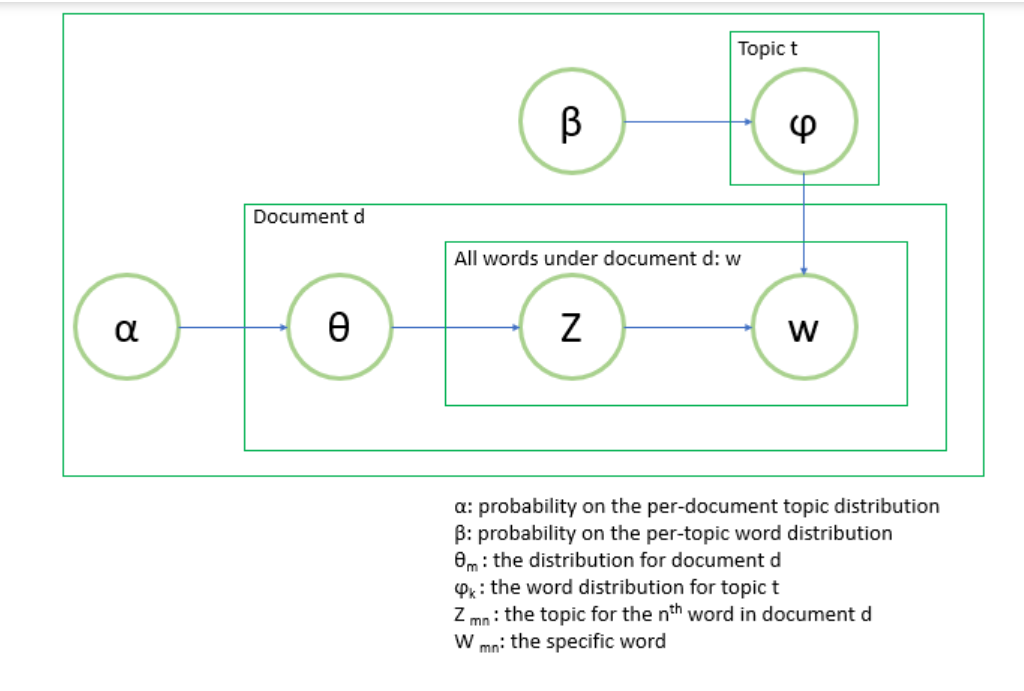

Hình ảnh trên mô tả mô hình Latent Dirichlet Allocation (LDA) trong xử lý ngôn ngữ tự nhiên. Đây là một mô hình đồ họa thể hiện cách LDA hoạt động để gán các từ trong tài liệu vào các chủ đề tiềm ẩn. Dưới đây là giải thích chi tiết:

- **α (alpha)**: Tham số điều khiển phân phối chủ đề trên từng tài liệu. Nó đại diện cho xác suất cho phân phối chủ đề của một tài liệu.
  
- **θ (theta)**: Phân phối chủ đề của một tài liệu cụ thể \( d \), cho biết xác suất mà mỗi chủ đề được gán cho tài liệu đó.

- **β (beta)**: Tham số điều khiển phân phối từ trên từng chủ đề. Nó đại diện cho xác suất cho phân phối từ của một chủ đề.

- **φ (phi)**: Phân phối từ cho một chủ đề cụ thể \( t \), cho biết xác suất mà mỗi từ trong chủ đề đó sẽ xuất hiện.

- **Z (z)**: Chủ đề \( t \) được gán cho từ thứ \( n \) trong tài liệu \( d \). Đây là biến tiềm ẩn đại diện cho việc từ \( w \) thuộc về chủ đề nào.

- **W (w)**: Từ thứ \( n \) cụ thể trong tài liệu \( d \).

### Diễn giải:
- Đầu tiên, mỗi tài liệu \( d \) có phân phối chủ đề \( θ \) được tạo từ tham số \( α \).
- Mỗi chủ đề \( t \) có phân phối từ \( φ \), được tạo từ tham số \( β \).
- Đối với từng từ \( w \) trong tài liệu \( d \), một chủ đề \( z \) sẽ được chọn từ phân phối \( θ \) của tài liệu đó.
- Sau đó, từ \( w \) sẽ được chọn từ phân phối từ \( φ \) tương ứng với chủ đề \( z \).

LDA phân loại các từ trong tài liệu dựa trên sự đồng xuất hiện của từ trong các chủ đề tiềm ẩn khác nhau, nhằm tạo ra sự phân phối chủ đề hợp lý cho từng tài liệu.

### lda2vec : Combing LDA and Word Embeddings for topic modeling

trực quan : https://multithreaded.stitchfix.com/blog/2016/05/27/lda2vec/#topic=38&lambda=1&term=

xem thêm : https://readmedium.com/combing-lda-and-word-embeddings-for-topic-modeling-fe4a1315a5b4

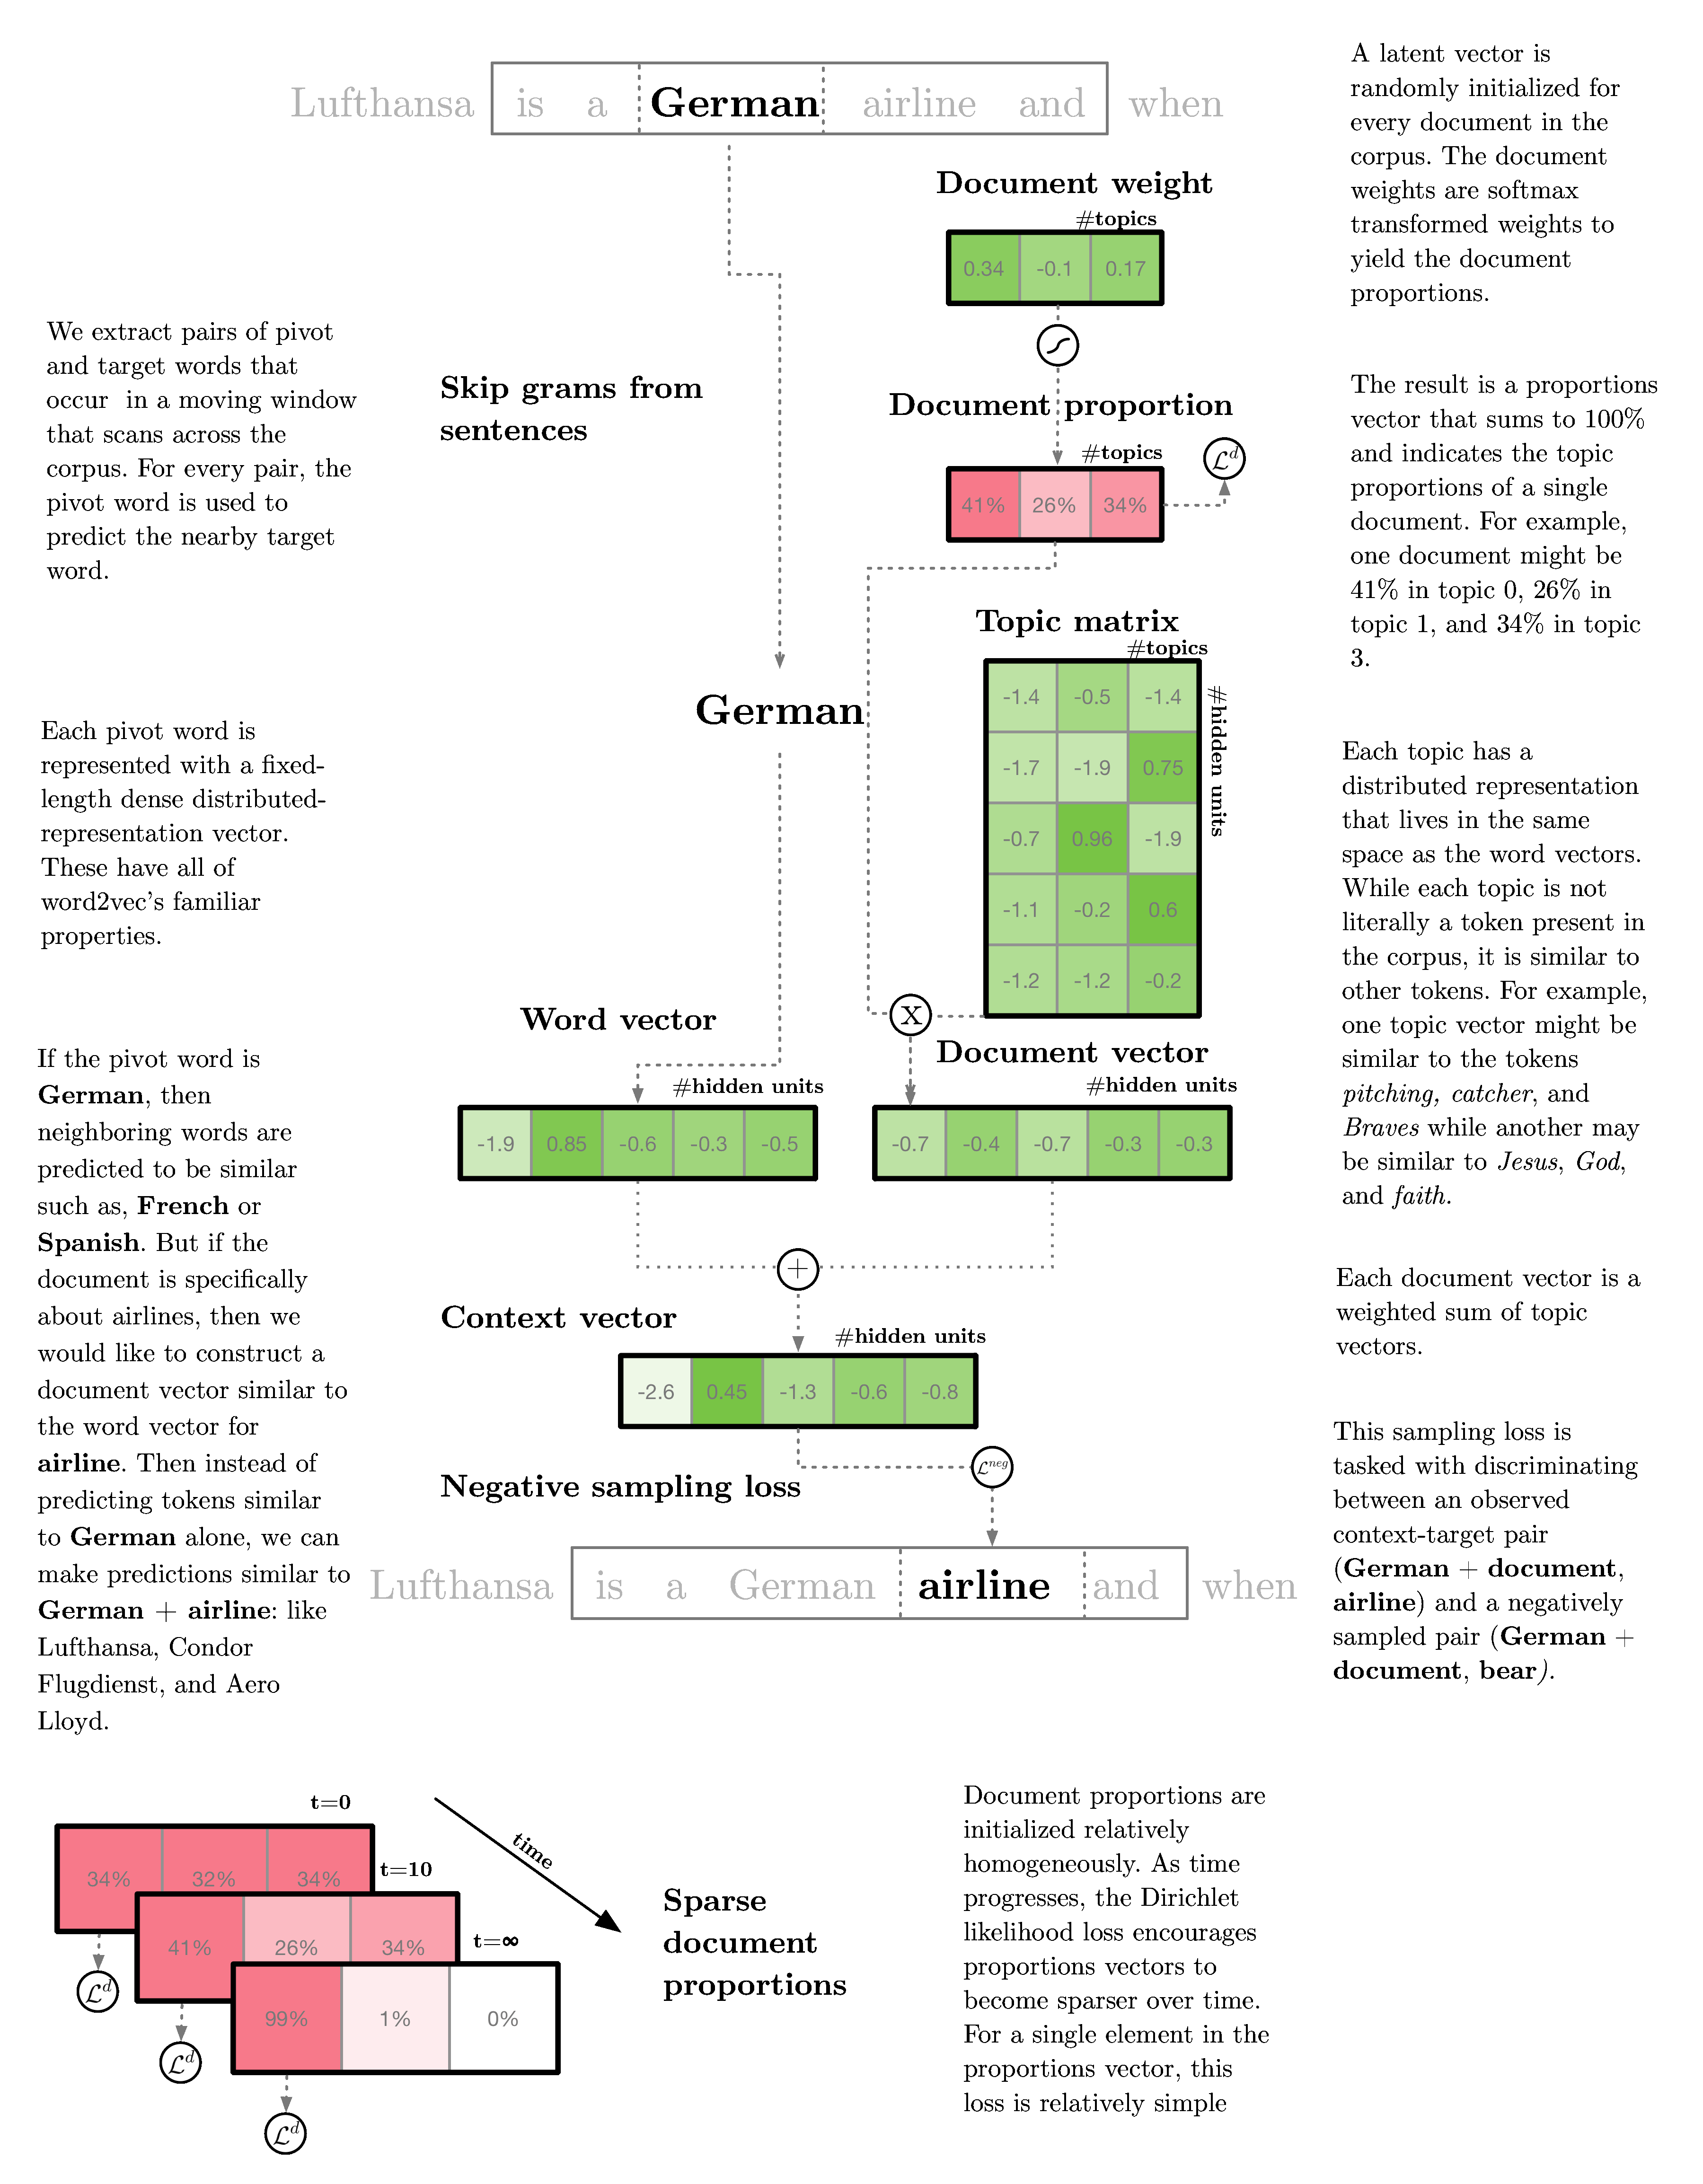